In [1]:
import pandas as pd
from google.colab import files
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**File Uploading**

In [2]:
upload = files.upload()

Saving british_airways_reviews.csv to british_airways_reviews.csv


**Basic Cleaning Before NLP**

In [3]:
data = pd.read_csv('british_airways_reviews.csv')
data.head()

,Unnamed: 0,title,reviews
0,0,"""unprofessional attitude of the pilots""",BA 246 21JAN 2023 Did not appreciate the unp...
1,1,“Next time it will be Jet2”,Not a great experience. I could not check in ...
2,2,“become the Ryanair of long-haul travel”,I was excited to fly BA as I'd not travelled ...
3,3,“They never help us”,I just want to warn everyone of the worst cu...
4,4,“uncomfortable seat and disgusting food”,Paid for business class travelling Cairo to L...


In [4]:
data = data[['title','reviews']]
data.head()

,title,reviews
0,"""unprofessional attitude of the pilots""",BA 246 21JAN 2023 Did not appreciate the unp...
1,“Next time it will be Jet2”,Not a great experience. I could not check in ...
2,“become the Ryanair of long-haul travel”,I was excited to fly BA as I'd not travelled ...
3,“They never help us”,I just want to warn everyone of the worst cu...
4,“uncomfortable seat and disgusting food”,Paid for business class travelling Cairo to L...


In [5]:
data.shape

(1300, 2)

In [6]:
data.isnull().sum()

,0
title,0
reviews,0


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.dtypes

,0
title,object
reviews,object


In [9]:
data['title'] = data['title'].str.strip()
data['reviews'] = data['reviews'].str.strip()

In [10]:
data['title'] = data['title'].str[1:-1] #Removing the double quotation in the title values
data.head(3)


,title,reviews
0,unprofessional attitude of the pilots,BA 246 21JAN 2023 Did not appreciate the unpro...
1,Next time it will be Jet2,Not a great experience. I could not check in o...
2,become the Ryanair of long-haul travel,I was excited to fly BA as I'd not travelled w...


**Using VADER for NLP Preprocessing**

Source:
Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [11]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [12]:
  from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
analyzer = SentimentIntensityAnalyzer()

In [14]:
text = "Thanks a lot for the product! It was really amazing! 🤩 It was SUPERB!!! ✨"
score = analyzer.polarity_scores(text)
score

{'neg': 0.0, 'neu': 0.418, 'pos': 0.582, 'compound': 0.9459}

In [15]:
def get_sentiment(text):
    return analyzer.polarity_scores(str(text))['compound'] #We are only concerned about the compound score.

In [16]:
data['Title Sentiment'] = data['title'].apply(get_sentiment)
data['Review Sentiment'] = data['reviews'].apply(get_sentiment)
data.head()

,title,reviews,Title Sentiment,Review Sentiment
0,unprofessional attitude of the pilots,BA 246 21JAN 2023 Did not appreciate the unpro...,-0.5106,0.5013
1,Next time it will be Jet2,Not a great experience. I could not check in o...,0.0000,0.8749
2,become the Ryanair of long-haul travel,I was excited to fly BA as I'd not travelled w...,0.0000,0.4770
3,They never help us,I just want to warn everyone of the worst cust...,-0.3089,-0.8838
4,uncomfortable seat and disgusting food,Paid for business class travelling Cairo to Lo...,-0.7184,-0.9722


Example where the VADER sentiment isn't perfoming well.

In [17]:
#text1 = "Absolutely pathetic business class product. BA is not even remotely competitive with other International airlines in the business class market. With old outdated 8 across seating - no, I did not make a typing mistake - you either have to climb across someone or someone has to climb across you to gain aisle access. The crew must also hate this layout since they have to reach through little window openings to provide service to passengers in the 2 center seats. BA, like most other European-based airlines does not have a factual Intra-European business class product even though they promote & sell business class. Intra-Europe flights feature the same 3+3 seating throughout the aircraft & the only difference being the middle seat is left empty in "business class" & passengers get a meal & drinks, but this does not justify the higher cost. BA's Trans-Atlantic business class product is only slightly better because of the "narrow" 8 across seating. The biggest surprise on both the LIS/LHR & LHR/IAH flights was that BA has, in fact, substantially improved their food quality. Shocking! Unfortunately, it is served in the WORST business class configurations of ANY International airline I have flown. The entertainment system & small screens - my laptop screen is twice the size - is like an airline offering 2 decades ago. The flight crew was "pleasant & perfunctory" which is about the best one can expect from a BA crew. BA will simply never match the quality of carriers like Singapore, Emirates, Qatar, Etihad, EVA, ANA, Japan, Air New Zealand, Qantas or many others. BA can compete with US-based airlines like Delta, American & United, which are also not even in the same Universe in terms of a high-quality business class product. One of the biggest slaps in the face is that BA expects business class passengers to pay to select seats, even though they have paid thousands of dollars to fly business class. Several hundred US dollars for Trans-Atlantic flights. Only if you wait until 24 hours before flight time are you allowed to select a seat at no cost. Certainly another BA Management decision that was made without a functioning brain."
score = analyzer.polarity_scores(data['reviews'].iloc[16])
score

{'neg': 0.071, 'neu': 0.819, 'pos': 0.11, 'compound': 0.9583}

  **Data Cleaning**

For some records, value of titile and reviews were totally opposite. So, removing all those records whose absolute difference between sentiment scores of title and reviews is greater than or equal to 1.

In [18]:
data = data[~(abs(data['Title Sentiment'] - data['Review Sentiment'] ) >= 1 )]
data.head()


,title,reviews,Title Sentiment,Review Sentiment
1,Next time it will be Jet2,Not a great experience. I could not check in o...,0.0000,0.8749
2,become the Ryanair of long-haul travel,I was excited to fly BA as I'd not travelled w...,0.0000,0.4770
3,They never help us,I just want to warn everyone of the worst cust...,-0.3089,-0.8838
4,uncomfortable seat and disgusting food,Paid for business class travelling Cairo to Lo...,-0.7184,-0.9722
5,Zero customer service,The plane was extremely dirty with chocolate s...,0.0000,-0.9079


In [19]:
Sentiment = data['Review Sentiment'].to_numpy()
Sentiment = np.select([data['Review Sentiment'] <= -0.5, data['Review Sentiment']>=0.5], ['Negative','Positive'], 'Neutral' )
data['Sentiment'] = Sentiment
data.head()

,title,reviews,Title Sentiment,Review Sentiment,Sentiment
1,Next time it will be Jet2,Not a great experience. I could not check in o...,0.0000,0.8749,Positive
2,become the Ryanair of long-haul travel,I was excited to fly BA as I'd not travelled w...,0.0000,0.4770,Neutral
3,They never help us,I just want to warn everyone of the worst cust...,-0.3089,-0.8838,Negative
4,uncomfortable seat and disgusting food,Paid for business class travelling Cairo to Lo...,-0.7184,-0.9722,Negative
5,Zero customer service,The plane was extremely dirty with chocolate s...,0.0000,-0.9079,Negative


In [20]:
data['Sentiment'].value_counts()

,count
Sentiment,
Positive,492
Negative,474
Neutral,254


In [21]:
data.sort_values('Sentiment',inplace = True)
data.head()

,title,reviews,Title Sentiment,Review Sentiment,Sentiment
472,can't be reached on the phone,"British Airways is getting worse an worse, my ...",-0.0762,-0.8441,Negative
1124,experience is so lacklustre,Brindisi to London. Flying from any airport th...,0.0000,-0.6795,Negative
513,waited for my bags for 3 hours,My flight yesterday 18/12/2021 was due to take...,0.0000,-0.8316,Negative
516,BA did nothing to ease the process,British Airways is taking reservations and the...,-0.2755,-0.8569,Negative
517,I don't even get an apology,"I have a flight booked for January 2022, they ...",0.0516,-0.7069,Negative


In [22]:
data['title'] = data['title'].str.lower()
data['reviews'] = data['reviews'].str.lower()
data.head()

,title,reviews,Title Sentiment,Review Sentiment,Sentiment
472,can't be reached on the phone,"british airways is getting worse an worse, my ...",-0.0762,-0.8441,Negative
1124,experience is so lacklustre,brindisi to london. flying from any airport th...,0.0000,-0.6795,Negative
513,waited for my bags for 3 hours,my flight yesterday 18/12/2021 was due to take...,0.0000,-0.8316,Negative
516,ba did nothing to ease the process,british airways is taking reservations and the...,-0.2755,-0.8569,Negative
517,i don't even get an apology,"i have a flight booked for january 2022, they ...",0.0516,-0.7069,Negative


**Combining title and reviews into 1 text feature**

In [23]:
data['reviews'] = data['title'].str.cat(data['reviews'], sep='. ')
data.head()


,title,reviews,Title Sentiment,Review Sentiment,Sentiment
472,can't be reached on the phone,can't be reached on the phone. british airways...,-0.0762,-0.8441,Negative
1124,experience is so lacklustre,experience is so lacklustre. brindisi to londo...,0.0000,-0.6795,Negative
513,waited for my bags for 3 hours,waited for my bags for 3 hours. my flight yest...,0.0000,-0.8316,Negative
516,ba did nothing to ease the process,ba did nothing to ease the process. british ai...,-0.2755,-0.8569,Negative
517,i don't even get an apology,i don't even get an apology. i have a flight b...,0.0516,-0.7069,Negative


In [24]:
data.drop(columns = ['title','Title Sentiment'], inplace = True)
data.head()

,reviews,Review Sentiment,Sentiment
472,can't be reached on the phone. british airways...,-0.8441,Negative
1124,experience is so lacklustre. brindisi to londo...,-0.6795,Negative
513,waited for my bags for 3 hours. my flight yest...,-0.8316,Negative
516,ba did nothing to ease the process. british ai...,-0.8569,Negative
517,i don't even get an apology. i have a flight b...,-0.7069,Negative


**Splitting the data into training and testing**

Using the sklearn.model_selection library.

Performing a stratified split: splitting the dataset into training and testing sets while maintaining the class distribution (i.e., the proportions of Negative, Positive, and Neutral sentiments) in both subsets.

Training data size: 70%

Testing data size: 30%

In [25]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    data,
    test_size=0.3,
    stratify=data['Sentiment'],  # Ensures same sentiment proportions
    random_state=42              # For reproducibility
)

# Optional: check proportions
print("Original distribution:\n", data['Sentiment'].value_counts(normalize=True))
print("Train distribution:\n", train_data['Sentiment'].value_counts(normalize=True))
print("Test distribution:\n", test_data['Sentiment'].value_counts(normalize=True))

Original distribution:
 Sentiment
Positive    0.403279
Negative    0.388525
Neutral     0.208197
Name: proportion, dtype: float64
Train distribution:
 Sentiment
Positive    0.402810
Negative    0.388759
Neutral     0.208431
Name: proportion, dtype: float64
Test distribution:
 Sentiment
Positive    0.404372
Negative    0.387978
Neutral     0.207650
Name: proportion, dtype: float64


In [26]:
train_data.shape

(854, 3)

In [27]:
test_data.shape

(366, 3)

In [28]:
train_data.to_csv('Train_Data.csv')
test_data.to_csv('Test_Data.csv')

**Getting insights from the dataframe**

Source: https://chatgpt.com/share/681b1811-a8bc-800e-a29c-d71ff3cf5874


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment'>

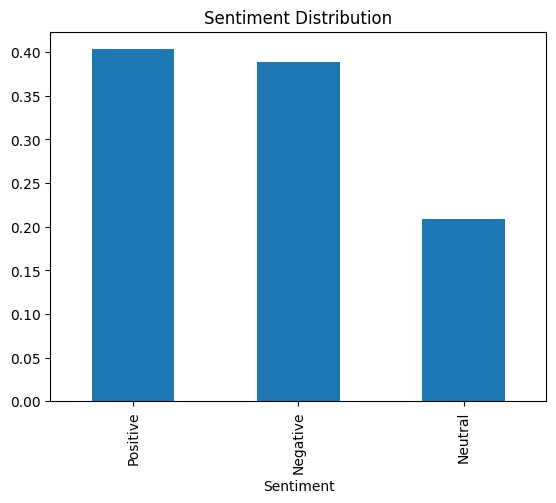

In [29]:
data['Sentiment'].value_counts(normalize=True).plot(kind='bar', title='Sentiment Distribution')

<Axes: xlabel='Review Sentiment', ylabel='Count'>

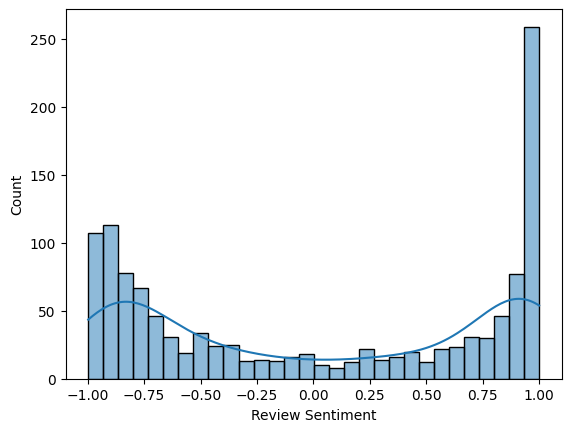

In [30]:
sns.histplot(data['Review Sentiment'], bins=30, kde=True)

In [31]:
worst_reviews = data[data['Review Sentiment'] <= -0.8].sort_values('Review Sentiment')
worst_reviews[['reviews','Review Sentiment']]

,reviews,Review Sentiment
826,service was totally unacceptable. hong kong to...,-0.9975
296,felt misguided and misinformed. vancouver to d...,-0.9961
288,the worst business class experience i've ever ...,-0.9944
902,my luggage arrived soaking wet. london to nash...,-0.9925
802,don’t know which airline is at fault. london t...,-0.9905
...,...,...
574,no refund issued yet. booked flight six months...,-0.8057
208,it was a nightmare. they changed our flights f...,-0.8055
1048,my flight was canceled. london to berlin sched...,-0.8048
182,check-in process was terrible. i haven't flown...,-0.8040


Most commonly used words in Positive, Negative an Neutral reviews

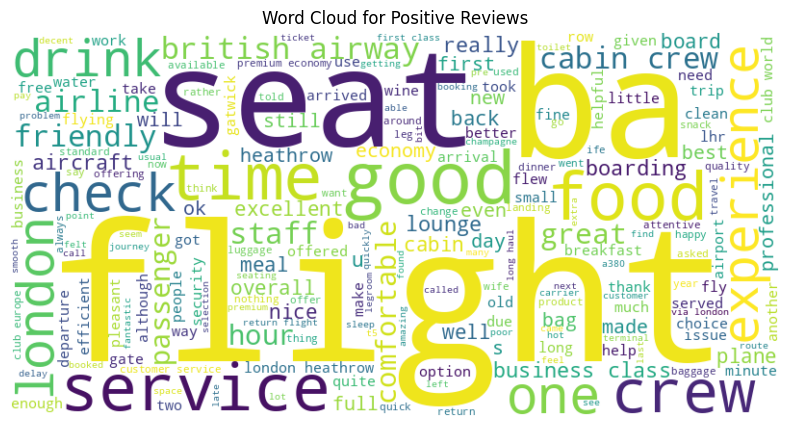

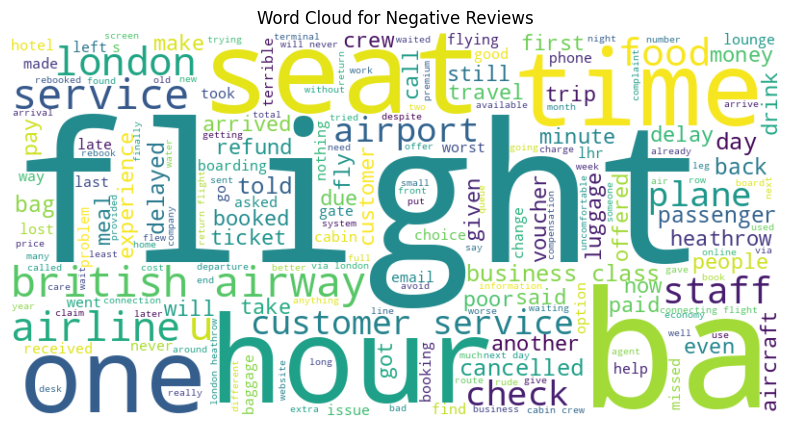

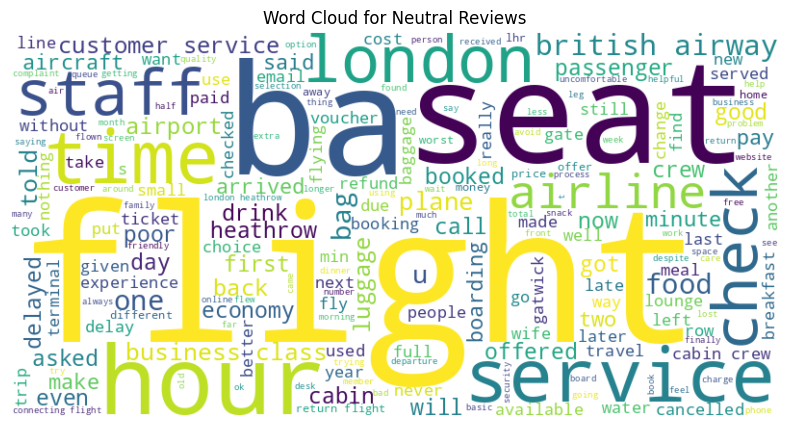

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = " ".join(data[data['Sentiment'] == sentiment]['reviews'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Reviews")
    plt.show()

In [33]:
data.sort_index(inplace = True)
data.to_csv("BA_Processed_Table.csv")